In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.decomposition import PCA
from catboost import CatBoostClassifier

e:\Bootcamp\DS_Grupo3\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
current_dir = os.getcwd()

parent_dir = os.path.abspath(os.path.join(current_dir, "../.."))
folder_path = 'data'
file_name = 'stroke_woe_smote.csv'

file_path = os.path.join(parent_dir, folder_path, file_name)

df = pd.read_csv(file_path)
df.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,bmi_category,age_category,glucose_level_category,stroke
0,1,0,1,1,0.059265,1,0.559182,0.176297,1.069885,0.921024,1
1,1,0,1,1,0.059265,0,-0.249627,0.176297,1.069885,-0.301429,1
2,0,0,0,1,0.059265,1,0.062398,0.176297,-0.367003,0.921024,1
3,0,1,0,1,0.528860,0,-0.249627,-0.543404,1.069885,0.921024,1
4,1,0,0,1,0.059265,1,0.559182,0.286053,1.069885,0.921024,1


In [4]:
y = df['stroke']
X = df.drop(['stroke'], axis = 1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 1337)

eval_set = [(X_train, y_train), (X_test, y_test)]

In [5]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-5, 100, log=True),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'random_seed': 42,
        'verbose': 0
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1337)
    accuracies = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]


        model = CatBoostClassifier(**params)
        model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=0)
    
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    return sum(accuracies) / len(accuracies)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params

final_model = CatBoostClassifier(**best_params)
final_model.fit(X, y)

[I 2024-10-10 22:57:33,098] A new study created in memory with name: no-name-275144de-31e6-485e-bf29-dcf0a7d5837b
[I 2024-10-10 22:57:54,844] Trial 0 finished with value: 0.7478335957908617 and parameters: {'iterations': 933, 'learning_rate': 0.06729335964073348, 'depth': 10, 'l2_leaf_reg': 11.681061259844014, 'border_count': 163}. Best is trial 0 with value: 0.7478335957908617.
[I 2024-10-10 22:57:58,337] Trial 1 finished with value: 0.7472002949788332 and parameters: {'iterations': 208, 'learning_rate': 0.24353363461310562, 'depth': 4, 'l2_leaf_reg': 2.4328355299380237e-05, 'border_count': 250}. Best is trial 0 with value: 0.7478335957908617.
[I 2024-10-10 22:58:04,214] Trial 2 finished with value: 0.7462490328677152 and parameters: {'iterations': 295, 'learning_rate': 0.14550098748695284, 'depth': 5, 'l2_leaf_reg': 0.26002971737315134, 'border_count': 5}. Best is trial 0 with value: 0.7478335957908617.
[I 2024-10-10 22:58:09,337] Trial 3 finished with value: 0.7440306670883838 and p

0:	learn: 0.6660773	total: 4.16ms	remaining: 3.63s
1:	learn: 0.6325126	total: 9.93ms	remaining: 4.32s
2:	learn: 0.6148220	total: 14.3ms	remaining: 4.13s
3:	learn: 0.5929948	total: 20.1ms	remaining: 4.37s
4:	learn: 0.5809055	total: 25.8ms	remaining: 4.47s
5:	learn: 0.5707212	total: 31.4ms	remaining: 4.54s
6:	learn: 0.5616937	total: 36.5ms	remaining: 4.52s
7:	learn: 0.5513578	total: 42.4ms	remaining: 4.58s
8:	learn: 0.5443259	total: 47ms	remaining: 4.51s
9:	learn: 0.5390798	total: 53.4ms	remaining: 4.61s
10:	learn: 0.5347432	total: 58.4ms	remaining: 4.58s
11:	learn: 0.5307311	total: 62.5ms	remaining: 4.49s
12:	learn: 0.5284505	total: 65.7ms	remaining: 4.34s
13:	learn: 0.5253020	total: 69.8ms	remaining: 4.28s
14:	learn: 0.5223999	total: 73.8ms	remaining: 4.22s
15:	learn: 0.5192174	total: 77.8ms	remaining: 4.17s
16:	learn: 0.5177675	total: 81.3ms	remaining: 4.09s
17:	learn: 0.5127641	total: 85.5ms	remaining: 4.06s
18:	learn: 0.5110739	total: 89.7ms	remaining: 4.03s
19:	learn: 0.5085768	tot

In [6]:
y_pred_final = final_model.predict(X_test)
accuracy_final = accuracy_score(y_test, y_pred_final)

cv_scores = cross_val_score(final_model, X, y, cv=5)
print(f"Puntajes de validación cruzada: {cv_scores}")
print(f"Media de los puntajes: {cv_scores.mean()}")

conf_matrix = confusion_matrix(y_test, y_pred_final)
class_report = classification_report(y_test, y_pred_final)

0:	learn: 0.6664399	total: 3.55ms	remaining: 3.09s
1:	learn: 0.6329742	total: 7.62ms	remaining: 3.32s
2:	learn: 0.6152380	total: 10.4ms	remaining: 3.02s
3:	learn: 0.5935899	total: 14.3ms	remaining: 3.1s
4:	learn: 0.5816082	total: 18ms	remaining: 3.12s
5:	learn: 0.5713675	total: 21.8ms	remaining: 3.15s
6:	learn: 0.5621742	total: 25.5ms	remaining: 3.16s
7:	learn: 0.5540586	total: 29.1ms	remaining: 3.15s
8:	learn: 0.5464815	total: 32.2ms	remaining: 3.09s
9:	learn: 0.5409711	total: 36.1ms	remaining: 3.12s
10:	learn: 0.5364396	total: 39.5ms	remaining: 3.1s
11:	learn: 0.5327472	total: 43.4ms	remaining: 3.11s
12:	learn: 0.5290122	total: 47.2ms	remaining: 3.13s
13:	learn: 0.5271372	total: 49.4ms	remaining: 3.03s
14:	learn: 0.5252007	total: 51.8ms	remaining: 2.96s
15:	learn: 0.5219166	total: 55.4ms	remaining: 2.97s
16:	learn: 0.5178438	total: 58.9ms	remaining: 2.97s
17:	learn: 0.5156920	total: 62.7ms	remaining: 2.98s
18:	learn: 0.5118804	total: 67ms	remaining: 3.01s
19:	learn: 0.5080954	total: 

Precisión del modelo: 0.7468309859154929


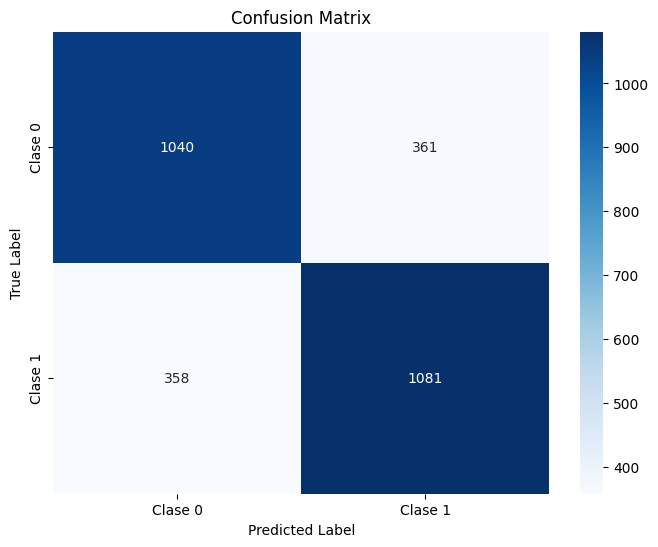

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      1401
           1       0.75      0.75      0.75      1439

    accuracy                           0.75      2840
   macro avg       0.75      0.75      0.75      2840
weighted avg       0.75      0.75      0.75      2840



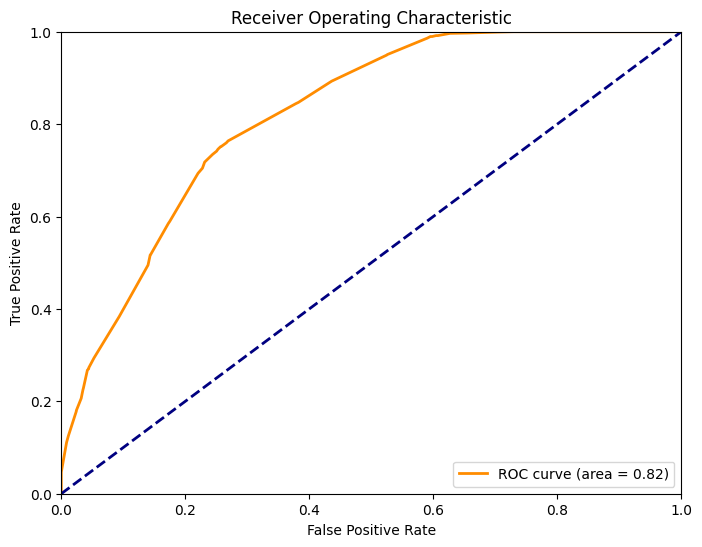

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')


print(f"Precisión del modelo: {accuracy_final}")
plt.show()
print("Reporte de clasificación:\n", class_report)

y_prob = final_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()